In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#from plotly.express import px
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [32]:
data = pd.read_csv("covid data day wise.csv")

In [33]:
data.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,22-01-2020,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,23-01-2020,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,24-01-2020,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,25-01-2020,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,26-01-2020,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [34]:
data.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')

In [35]:
data.isnull().sum()

Date                      0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
No. of countries          0
dtype: int64

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
Date                      180 non-null object
Confirmed                 180 non-null int64
Deaths                    180 non-null int64
Recovered                 180 non-null int64
Active                    180 non-null int64
New cases                 180 non-null int64
New deaths                180 non-null int64
New recovered             180 non-null int64
Deaths / 100 Cases        180 non-null float64
Recovered / 100 Cases     180 non-null float64
Deaths / 100 Recovered    180 non-null float64
No. of countries          180 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 17.0+ KB


In [37]:
np.set_printoptions(suppress = True)
data.describe()


,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
count,1.800000e+02,180.000000,1.800000e+02,1.800000e+02,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,3.904246e+06,212856.400000,1.759146e+06,1.932244e+06,80706.133333,3367.444444,44490.500000,4.900556,33.274056,22.836556,142.405556
std,4.212186e+06,204993.064964,2.244228e+06,1.817369e+06,68684.344703,2508.583867,49608.667032,1.608470,15.817427,22.873881,66.045836
min,5.550000e+02,17.000000,2.800000e+01,5.100000e+02,0.000000,0.000000,0.000000,2.040000,1.710000,6.280000,6.000000
25%,1.042935e+05,3528.250000,5.596750e+04,5.758575e+04,4571.250000,201.250000,2435.500000,3.440000,22.262500,10.205000,93.750000
50%,2.515015e+06,177543.500000,6.447705e+05,1.692701e+06,79773.500000,3958.500000,28160.000000,4.980000,34.240000,15.905000,184.000000
75%,6.656715e+06,393412.000000,2.896840e+06,3.366463e+06,121269.500000,5311.000000,72123.500000,6.395000,47.292500,25.740000,187.000000
max,1.450675e+07,606157.000000,8.008318e+06,5.892272e+06,252533.000000,8890.000000,284368.000000,7.190000,55.420000,134.430000,187.000000


In [38]:

data['Confirmed'].describe()

count    1.800000e+02
mean     3.904246e+06
std      4.212186e+06
min      5.550000e+02
25%      1.042935e+05
50%      2.515015e+06
75%      6.656715e+06
max      1.450675e+07
Name: Confirmed, dtype: float64

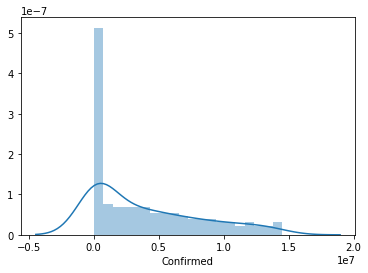

In [39]:
sns.distplot(data['Confirmed'],kde=True,bins=20)

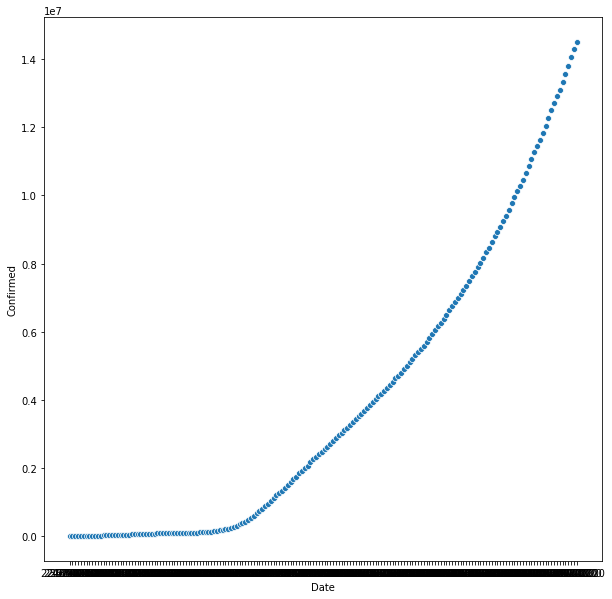

In [40]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'Date', y = 'Confirmed', data = data)

So, the rate of change of 'Confirmed' cases is increasing with increase in date.

In [41]:
data.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')

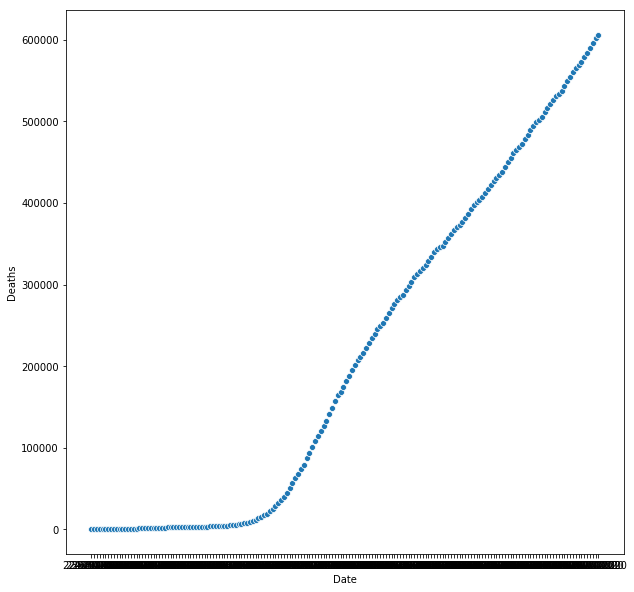

In [42]:
plt.figure(figsize = (10,10))
sns.scatterplot(data['Date'], data['Deaths'])

So, this graph is also similar to the previous one. Hence we can say that rate of change of Death is increating with respect to change in date.

In [43]:
data.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')

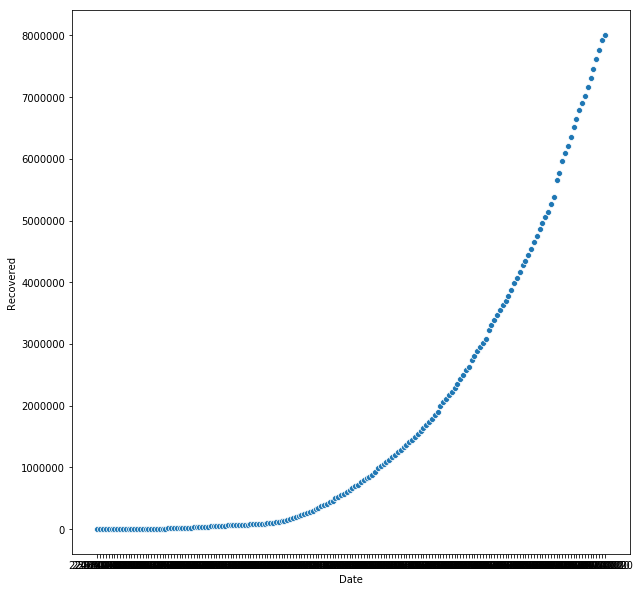

In [44]:
plt.figure(figsize = (10,10))
sns.scatterplot(data['Date'], data['Recovered'])

Exponential increase in cases recovered.

In [45]:
data.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')

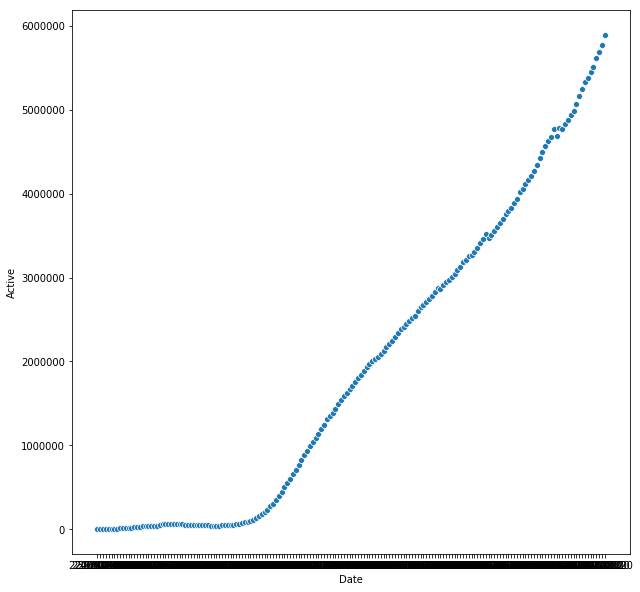

In [46]:
plt.figure(figsize = (10,10))
sns.scatterplot(data['Date'], data['Active'])

In [47]:
data.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')

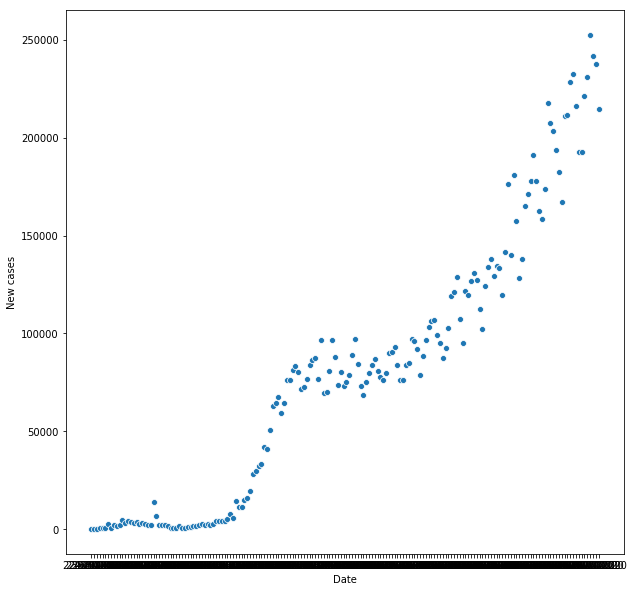

In [48]:
plt.figure(figsize = (10,10))
sns.scatterplot(data['Date'], data['New cases'])

By observing the graph we can say that it is not exactly exponential but yeah the change would be curvi-linear for sure.

In [49]:
data.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')

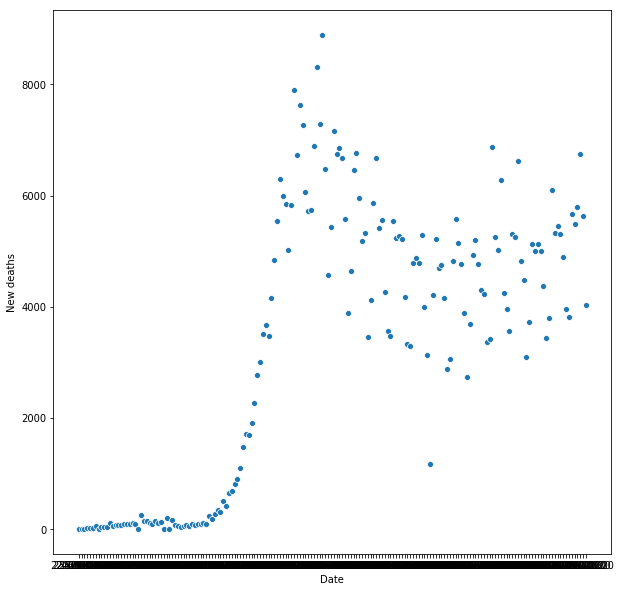

In [50]:
plt.figure(figsize = (10,10))
sns.scatterplot(data['Date'], data['New deaths'])

All we can say is, they have a good positive correlation but linearity can not be predicted by the above graph.

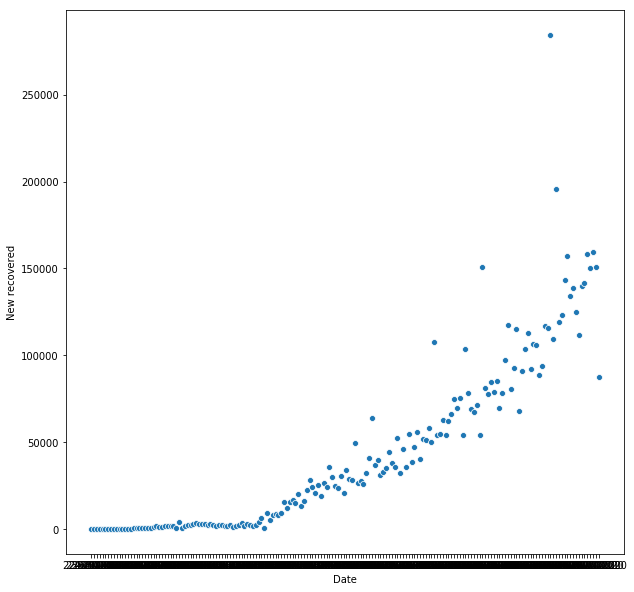

In [51]:
plt.figure(figsize = (10,10))
sns.scatterplot(data['Date'], data['New recovered'])

Exponential increase in the data with few outliers.

In [52]:
data.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')

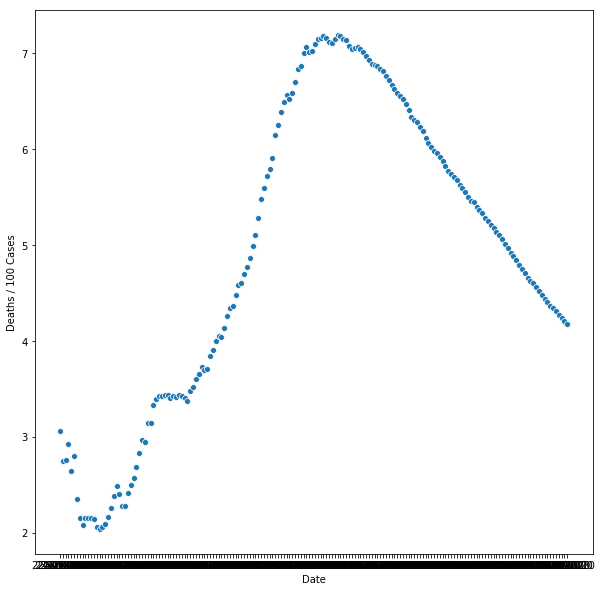

In [53]:
plt.figure(figsize = (10,10))
sns.scatterplot(data['Date'], data['Deaths / 100 Cases'])

This graph is very important. As we can clearly see that this chances of surviving COVID-19  has dropped sharply. While initially it was very high. Very important insight. 

In [54]:
data.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')

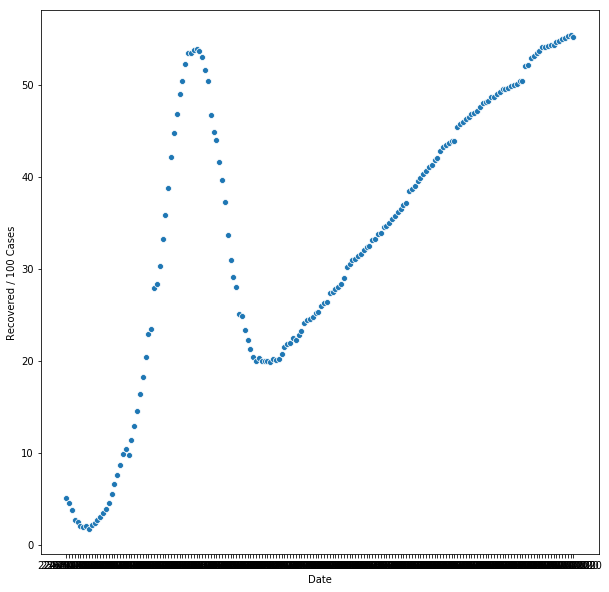

In [55]:
plt.figure(figsize = (10,10))
sns.scatterplot(data['Date'], data['Recovered / 100 Cases'])

There is see-saw type of relationship between these two variables. As we can see that chances of getting recovered were increased at the beginning and then dropped sharply and then again rose linearly till today. 

In [56]:
data.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')

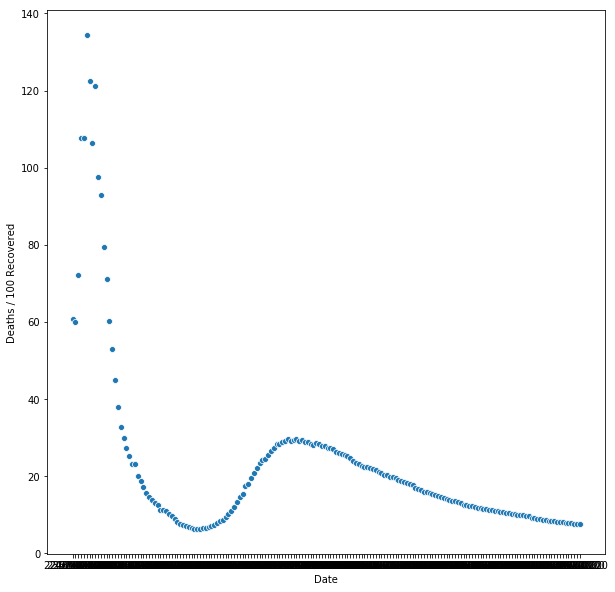

In [57]:
plt.figure(figsize = (10,10))
sns.scatterplot(data['Date'], data['Deaths / 100 Recovered'])

This is another important insight. Chances of person dying have decreased.

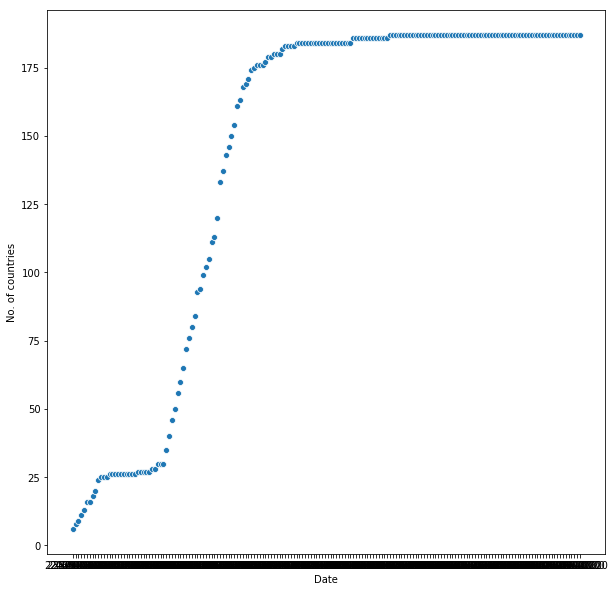

In [58]:
plt.figure(figsize = (10,10))
sns.scatterplot(data['Date'], data['No. of countries'])

So, number of countries who got affected from COVID-19 has got saturated after increasing.

In [59]:
data.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')

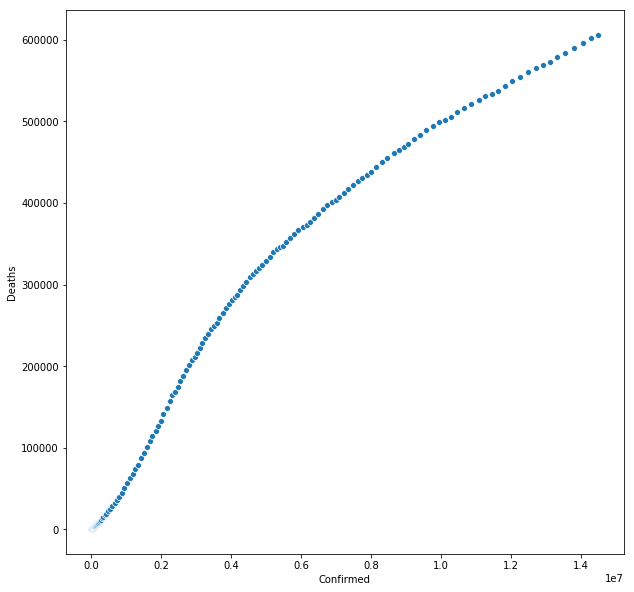

In [62]:
plt.figure(figsize = (10,10))
sns.scatterplot(data['Confirmed'], data['Deaths'])

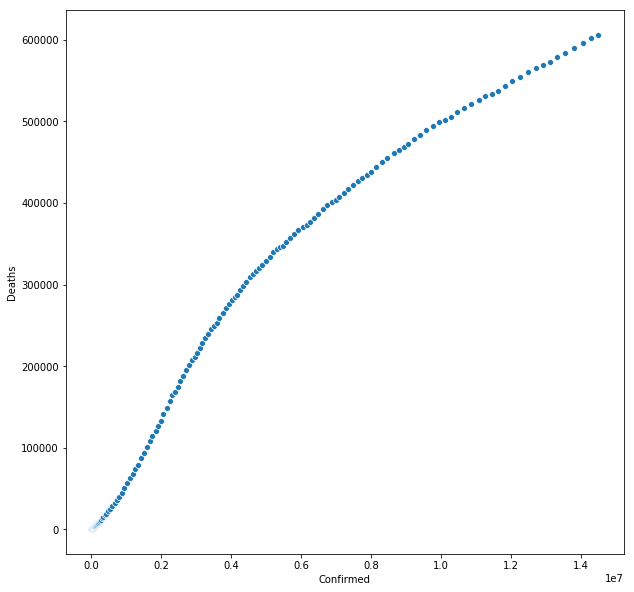

In [63]:
plt.figure(figsize = (10,10))
sns.scatterplot(data['Confirmed'], data['Deaths'])

<Figure size 360x360 with 0 Axes>

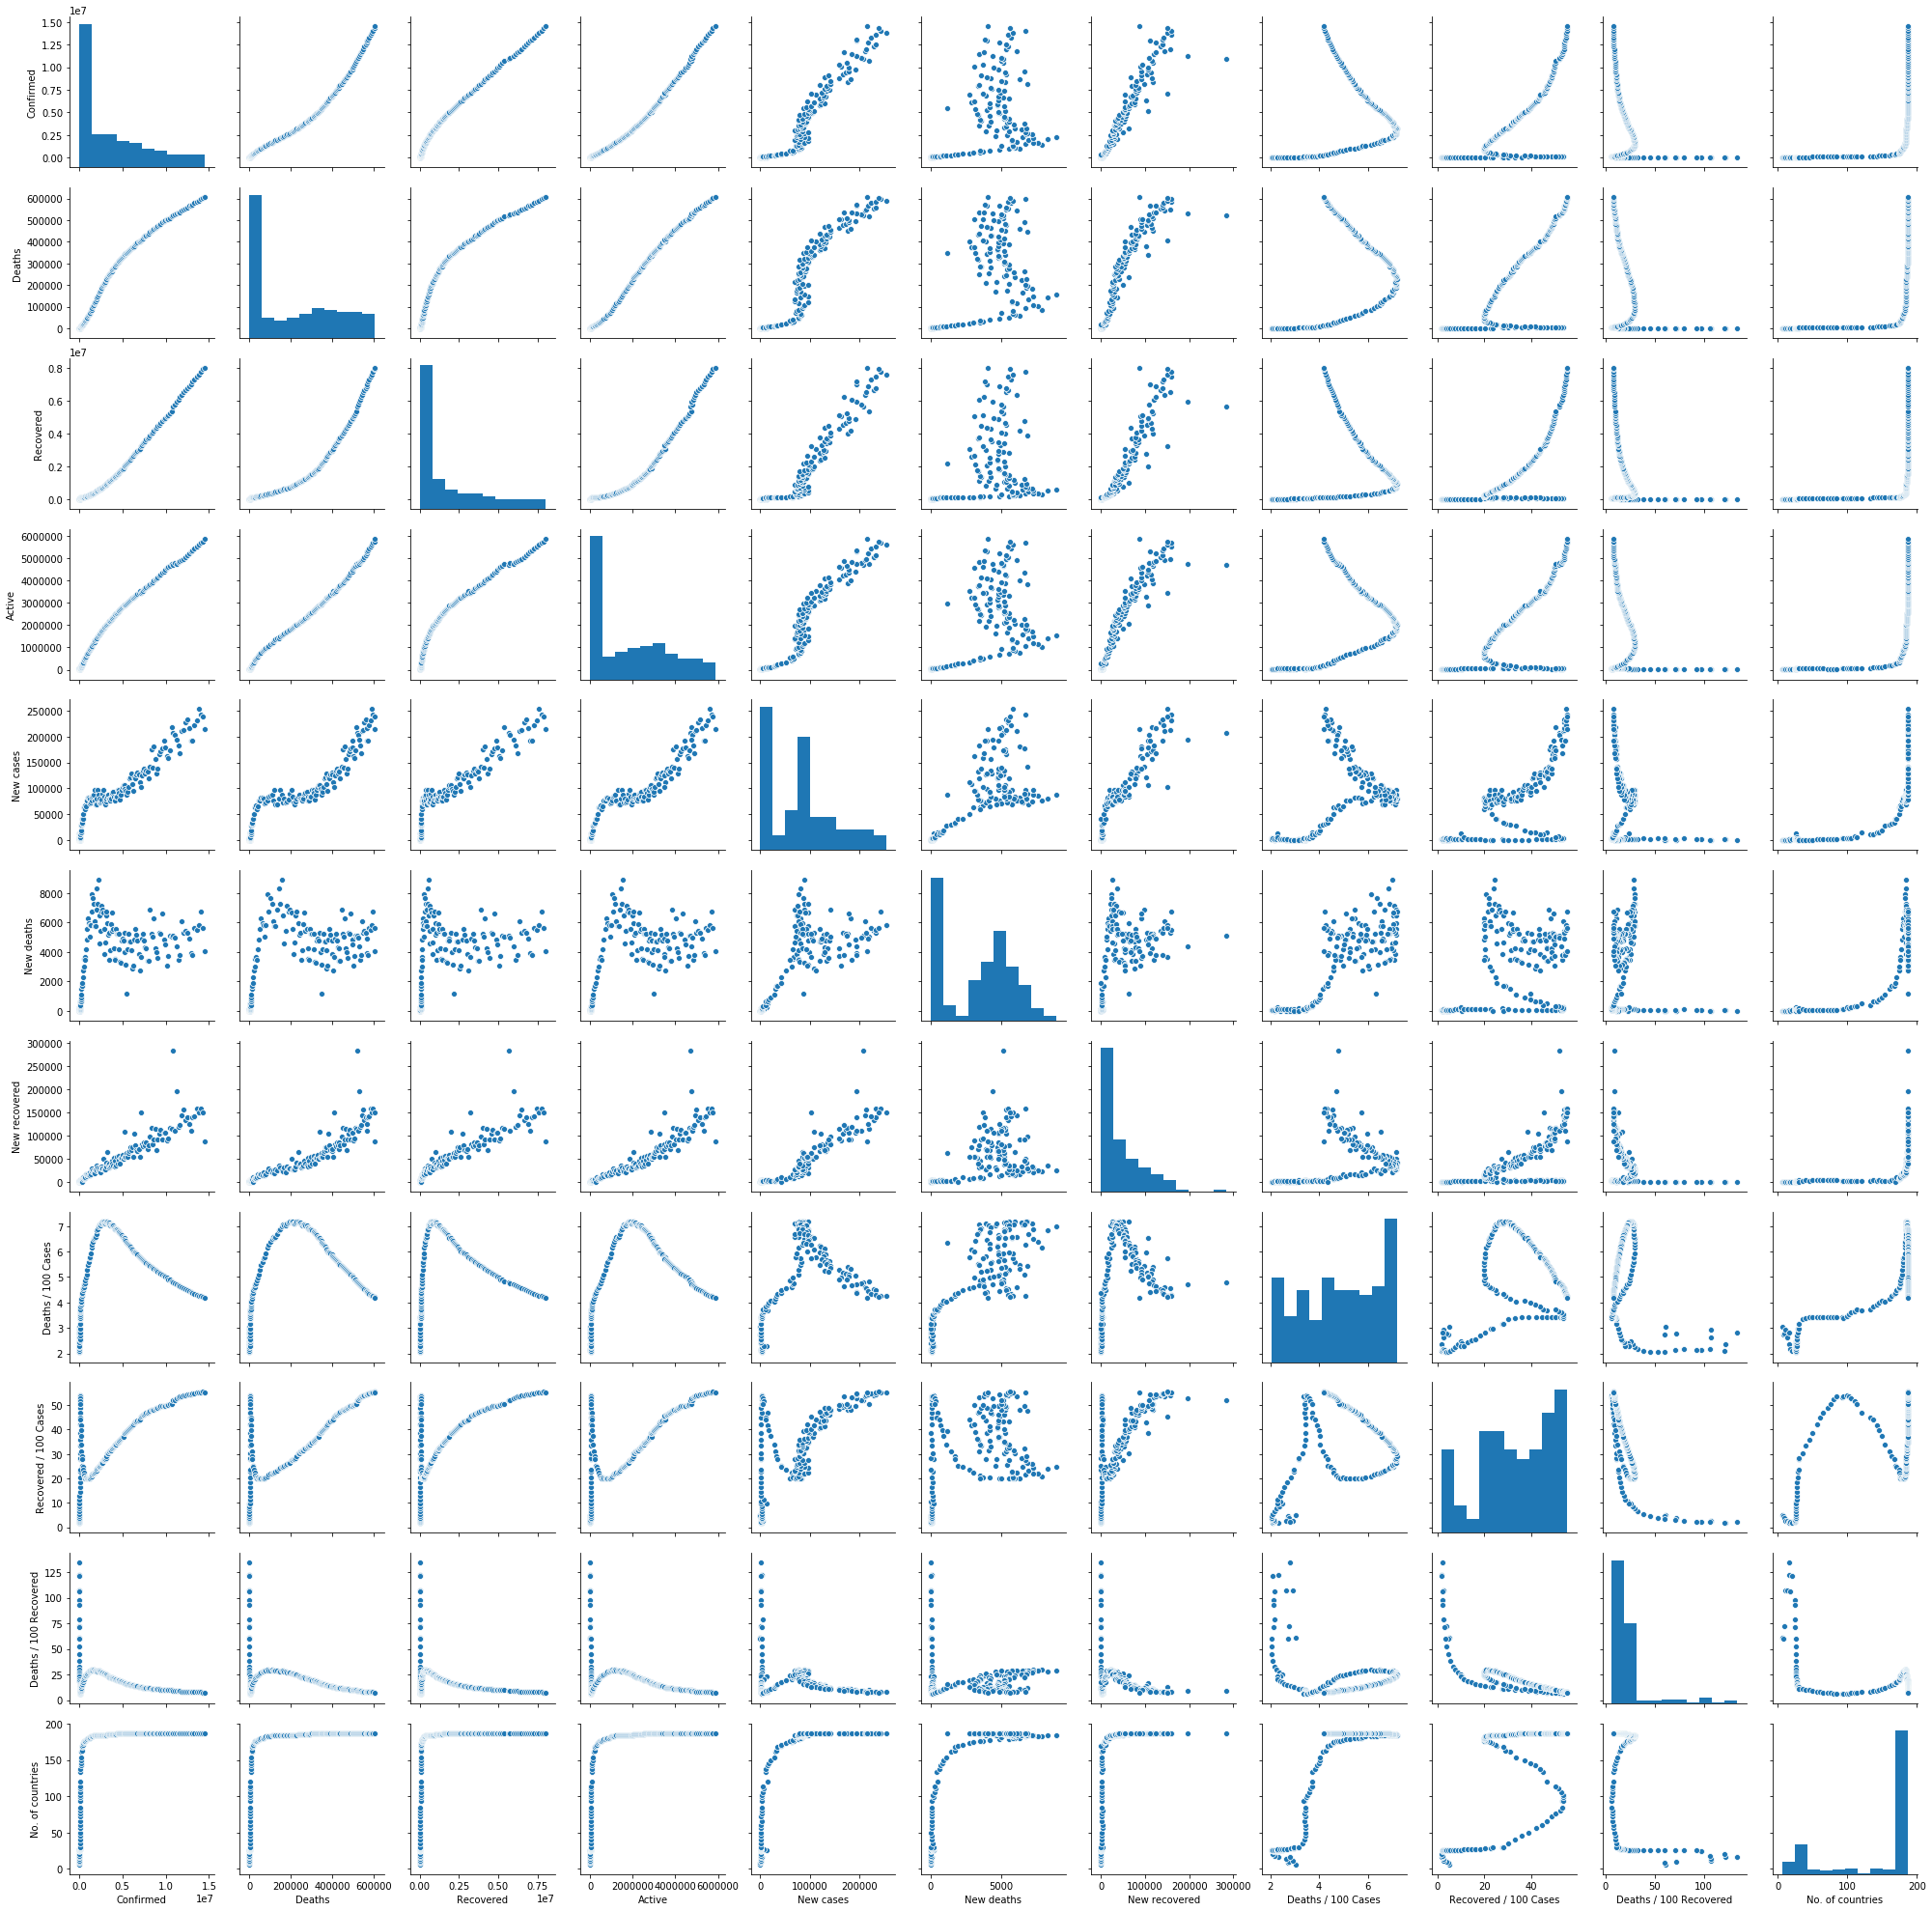

In [65]:
plt.figure(figsize = (5,5))
sns.pairplot(data)

In [66]:
data

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,22-01-2020,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,23-01-2020,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,24-01-2020,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,25-01-2020,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,26-01-2020,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
5,27-01-2020,2927,82,61,2784,809,26,9,2.80,2.08,134.43,16
6,28-01-2020,5578,131,107,5340,2651,49,46,2.35,1.92,122.43,16
7,29-01-2020,6166,133,125,5908,588,2,18,2.16,2.03,106.40,18
8,30-01-2020,8234,171,141,7922,2068,38,16,2.08,1.71,121.28,20
9,31-01-2020,9927,213,218,9496,1693,42,77,2.15,2.20,97.71,24


In [72]:
start_date = '22-01-2020'
end_date = '19-07-2020'

In [73]:
dates = pd.date_range(start_date, end_date)

In [74]:
data.drop(labels = 'Date', axis = 1)

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
5,2927,82,61,2784,809,26,9,2.80,2.08,134.43,16
6,5578,131,107,5340,2651,49,46,2.35,1.92,122.43,16
7,6166,133,125,5908,588,2,18,2.16,2.03,106.40,18
8,8234,171,141,7922,2068,38,16,2.08,1.71,121.28,20
9,9927,213,218,9496,1693,42,77,2.15,2.20,97.71,24
